# Telecom Customer Churn Prediction 

The telecom customer churn prediction project aims to develop a predictive model that can accurately identify customers who are likely to churn in the telecommunications industry. Churn, in this context, refers to the situation where customers terminate their subscriptions or switch to a competitors telecom service. By predicting churn in advance, telecom companies can proactively implement strategies to retain at-risk customers and minimize revenue loss.

### Importing Necessary Libraries

In [1]:
#Importing necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import * # module math
import matplotlib.pyplot as plt # visualization
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pickle 

In [2]:
#Data collection
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
test_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [3]:
train_data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

### Data Overview 

In [4]:
train_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
train_data.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
# A clear vision about the dataset with the neumarical values
train_data.shape

(2666, 20)

In [7]:
#size of the dataset
train_data.size

53320

In [8]:
train_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
def dataoverview(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [10]:
dataoverview(train_data, "A Overview about the train dataset")

A Overview about the train dataset:

Rows: 2666

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:
State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes        

In [11]:
dataoverview(test_data, "A Overview about the test dataset")

A Overview about the test dataset:

Rows: 667

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:
State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl ca

## Exploratory Data Analysis(EDA)

### Customer churn in data

In [12]:
# Your data and trace definition

trace = go.Pie(labels=train_data["Churn"].value_counts().keys().tolist(),
               values=train_data["Churn"].value_counts().values.tolist(),
               marker=dict(colors=['green', 'red'],
                           line=dict(color="white", width=1.3)
                           ),
               rotation=90,
               hoverinfo="label+value+text",
               hole=0.55
               )

layout = go.Layout(
    title=dict(
        text="Customer churn in training data",
        x=0.5,  # Set the x position to 0.5 for center alignment
    ),
    plot_bgcolor="rgb(243,243,243)",
    paper_bgcolor="rgb(243,243,243)"
)

data = [trace]
fig = go.Figure(data=data, layout=layout)

# Use py.iplot to display the plot in a Jupyter Notebook or JupyterLab
py.iplot(fig)


### Variable Distributions

In [13]:
#Separating columns to be visualized
out_cols = list(set(train_data.nunique()[train_data.nunique()<6].keys().tolist()
                    + train_data.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in train_data.columns if x not in out_cols] + ['Churn']

sns.pairplot(train_data[viz_cols], diag_kind="kde")
plt.show()

Several of the numerical data are very correlated. (Total day minutes and Total day charge), (Total eve minutes and Total eve charge), (Total night minutes and Total night charge) and lastly (Total intl minutes and Total intl charge) are alo correlated. We only have to select one of them.

## Data Preprocessing 

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Removing correlated and unnecessary columns
#col_to_drop = ['State', 'Area code', 'Total day charge', 'Total eve charge', 
#               'Total night charge', 'Total intl charge']
col_to_drop = ['State',
 'Area code',
 'Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge',]
   
train_data = train_data.drop(columns=col_to_drop, axis=1)
test_data = test_data.drop(columns=col_to_drop, axis=1)


In [ ]:
# Target column
target_col = ["Churn"]

# Number of levels in feature to be a categorical feature
nlevels = 6

# Separating categorical and numerical columns
# Categorical columns
cat_cols = list(set(train_data.nunique()[train_data.nunique() < nlevels].keys().tolist() 
                    + train_data.select_dtypes(include='object').columns.tolist()))
cat_cols = [x for x in cat_cols if x not in target_col]

# Numerical columns
num_cols = [x for x in train_data.columns if x not in cat_cols + target_col]

# Binary columns with 2 values
bin_cols = train_data.nunique()[train_data.nunique() == 2].keys().tolist()

# Columns with more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]


# Label encoding Binary columns
le = LabelEncoder()
label_encoders = {}
for i in bin_cols:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i] = le.transform(test_data[i])
    label_encoders[i] = le

# Combining the train and test datasets
trainsize = train_data.shape[0]
comb = pd.concat((train_data, test_data), sort=False)

# Duplicating columns for multi-value columns
comb = pd.get_dummies(data=comb, columns=multi_cols)

# Separating the train and test datasets
train_data = comb[:trainsize]
test_data = comb[trainsize:]


#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(train_data[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

scaled_test = std.transform(test_data[num_cols])
scaled_test = pd.DataFrame(scaled_test, columns=num_cols)
# Dropping original values and merging scaled values for numerical columns
df_train_data_og = train_data.copy()
train_data = train_data.drop(columns=num_cols, axis=1)
train_data = train_data.merge(scaled, left_index=True, right_index=True, how="left")

df_test_data_og = test_data.copy()
test_data = test_data.drop(columns=num_cols, axis=1)
test_data = test_data.merge(scaled_test, left_index=True, right_index=True, how="left") 
train_data_final = train_data
test_data_final = test_data


In [ ]:
print(bin_cols)
print(multi_cols)
print(num_cols)
test_data_final.head()

['International plan', 'Voice mail plan', 'Churn']
[]
['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls', 'Customer service calls']


,International plan,Voice mail plan,Churn,Account length,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,0,0,0,0.414080,-0.589414,0.092590,-0.165639,2.968355,-0.993351,0.288179,-0.520538,-0.551334,-0.190317,-0.429172
1,0,0,1,-0.900493,-0.589414,-0.929547,1.835921,0.551880,-0.844524,0.150304,0.561110,0.883476,0.624104,1.859175
2,0,0,1,1.526412,-0.589414,2.830588,-1.666809,2.304855,-0.149999,-0.799061,1.436730,-1.735052,1.845734,1.859175
3,0,0,0,0.262399,-0.589414,-1.274564,0.134595,-1.238393,0.098046,-0.227866,0.252068,-0.910036,0.624104,0.333610
4,0,0,0,-1.304977,-0.589414,-1.110358,0.835141,0.288835,0.445308,-0.442556,-0.520538,0.309552,-1.411947,-0.429172


In [ ]:
train_data_final.to_csv('../data/processed/train_final', index = False)
test_data_final.to_csv('../data/processed/test_final', index = False)

In [ ]:
#saving the model
model_filename1 = '../models/label_encoder.pkl'
with open(model_filename1, 'wb') as f:
    pickle.dump(label_encoders, f)


In [ ]:
# Saving StandardScaler 
model_filename2 = '../models/standard_scaler.pkl'
with open(model_filename2, 'wb') as f:
    pickle.dump(std, f)

### Variable Summary 

In [ ]:
summary = (df_train_data_og[[i for i in df_train_data_og.columns]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Training variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

## Correlation Matrix

In [ ]:
#correlation
correlation = train_data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar = dict(title = "Pearson Correlation coefficients", titleside = "right"),
                  )
layout = go.Layout(dict(title = "Correlation matrix",
                        autosize = False,
                        height = 720,
                        width = 800,
                        margin = dict(r = 0, l = 210, t = 25, b = 210),
                        yaxis = dict(tickfont = dict(size = 9)),
                        xaxis = dict(tickfont = dict(size = 9))
                       )
                  )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Visualizing data with principal components

In [ ]:
def pca_scatter(pcadf, targetfeature, targetlabel, color):
    tracer = go.Scatter(x = pcadf[pcadf[targetfeature]==targetlabel]["PC1"],
                        y = pcadf[pcadf[targetfeature]==targetlabel]["PC2"],
                        name = targetlabel, mode = "markers",
                        marker = dict(color = color, line = dict(width = .5), symbol = "diamond-open"),
                       )
    return tracer

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X = train_data[[i for i in train_data.columns if i not in target_col]]
Y = train_data[target_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components, columns = ["PC1", "PC2"])
pca_data = pca_data.merge(Y, left_index=True, right_index=True, how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1: "Churn", 0: "Not churn"})

layout = go.Layout(dict(title = "Visualizing data with PCA",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "first principal component (PC1)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "second principal component (PC2)",
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        height = 400
 )
                  )
trace1 = pca_scatter(pca_data, 'Churn', 'Churn', 'red')
trace2 = pca_scatter(pca_data, 'Churn', 'Not churn', 'royalblue')
data = [trace2, trace1]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

# Model Building <a id="model-building"></a>

In [ ]:
def telecom_churn_prediction(algorithm, training_x, testing_x, training_y, testing_y, cf, threshold_plot):
    #model
    algorithm.fit(training_x, training_y)
    predictions = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
        
    print('Algorithm:', type(algorithm).__name__)
    print("\nClassification report:\n", classification_report(testing_y, predictions))
    print("Accuracy Score:", accuracy_score(testing_y, predictions))
    
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y, predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y, predictions) 
    print("Area under curve:", model_roc_auc,"\n")
    
    fpr, tpr, thresholds = roc_curve(testing_y, probabilities[:,1])
     
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix,
                        x = ["Not churn", "Churn"],
                        y = ["Not churn", "Churn"],
                        showscale = False, colorscale = "Picnic",
                        name = "Confusion matrix")
    #plot roc curve
    trace2 = go.Scatter(x = fpr, y = tpr,
                        name = "Roc: " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'), width = 2))
    trace3 = go.Scatter(x = [0,1], y = [0,1],
                        line = dict(color = ('rgb(205, 12, 24)'), width = 2,
                        dash = 'dot'))
    
    if cf in ['coefficients', 'features']:
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)
        
        column_df = pd.DataFrame(training_x.columns.tolist())
        coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
        coef_sumry.columns = ["coefficients", "features"]
        coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
         #plot coeffs
        trace4 = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"], 
                        name = "coefficients",
                        marker = dict(color = coef_sumry["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = .6, color = "black")
                                     )
                       )
        #subplots
        fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                                subplot_titles=('Confusion matrix',
                                                'Receiver operating characteristic',
                                                'Feature importances')
                           )  
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig.append_trace(trace4,2,1)
        fig['layout'].update(showlegend=False, title="Model performance",
                             autosize=False, height = 900, width = 800,
                             plot_bgcolor = 'rgba(240,240,240, 0.95)',
                             paper_bgcolor = 'rgba(240,240,240, 0.95)',
                             margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
        fig["layout"]["xaxis3"].update(dict(showgrid = True, tickfont = dict(size = 10), tickangle = 90))
        
    elif cf == 'None':
        #subplots
        fig = make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion matrix',
                                            'Receiver operating characteristic')
                           )
        fig.append_trace(trace1,1,1)
        fig.append_trace(trace2,1,2)
        fig.append_trace(trace3,1,2)
        fig['layout'].update(showlegend=False, title="Model performance",
                         autosize=False, height = 500, width = 800,
                         plot_bgcolor = 'rgba(240,240,240,0.95)',
                         paper_bgcolor = 'rgba(240,240,240,0.95)',
                         margin = dict(b = 195))
        fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
        fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))  
        
    py.iplot(fig)
    
    if threshold_plot == True: 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

import statsmodels.api as sm
from yellowbrick.classifier import DiscriminationThreshold

#defining the studied or used independent features (columns) as well the target  
cols = [i for i in train_data.columns if i not in target_col]
target_col = ['Churn']

#splitting the principal training dataset to subtrain and subtest datasets
x_train, x_test, y_train, y_test = train_test_split(train_data[cols], train_data[target_col], 
                                                    test_size = .25, random_state = 111)

#splitting the no scaled principal training dataset to subtrain and subtest datasets
x_train_og, x_test_og, y_train_og, y_test_og = train_test_split(df_train_data_og[cols], train_data[target_col],
                                                                test_size = .25, random_state = 111)

#  Logistic Regression  <a id = " logistic regression" > </a>

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       547
           1       0.52      0.13      0.21       120

    accuracy                           0.82       667
   macro avg       0.68      0.55      0.56       667
weighted avg       0.78      0.82      0.78       667

Accuracy Score: 0.8215892053973014
Area under curve: 0.5529555149299208 



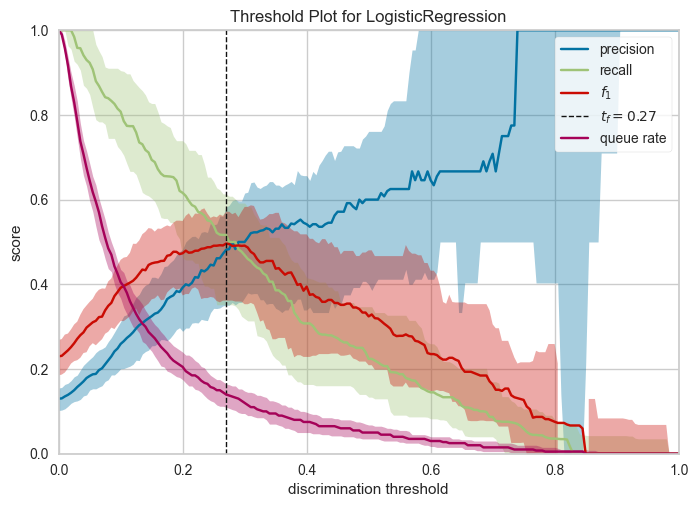

In [ ]:
from sklearn.linear_model import LogisticRegression

#Baseline model        
logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                           verbose=0, warm_start=False)

telecom_churn_prediction(logit, x_train, x_test, y_train, y_test, "coefficients", threshold_plot=True)

##  Decision Tree Classifier  

In [ ]:
def treeplot(classifier, cols, classnames):
    #plot decision tree
    graph = Source(tree.export_graphviz(classifier, out_file=None, 
                                        rounded=True, proportion=False,
                                        feature_names = cols, 
                                        precision = 2,
                                        class_names = classnames,
                                        filled = True)
                  )
    display(graph)


Algorithm: DecisionTreeClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       547
           1       0.79      0.63      0.70       120

    accuracy                           0.90       667
   macro avg       0.86      0.80      0.82       667
weighted avg       0.90      0.90      0.90       667

Accuracy Score: 0.904047976011994
Area under curve: 0.7983851310176721 



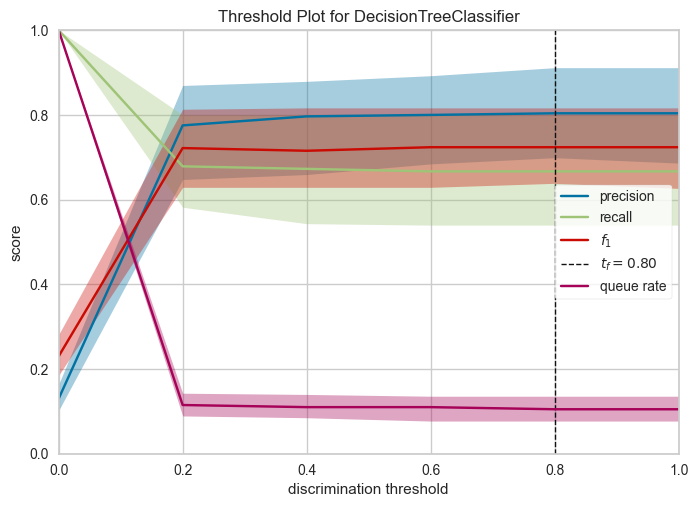

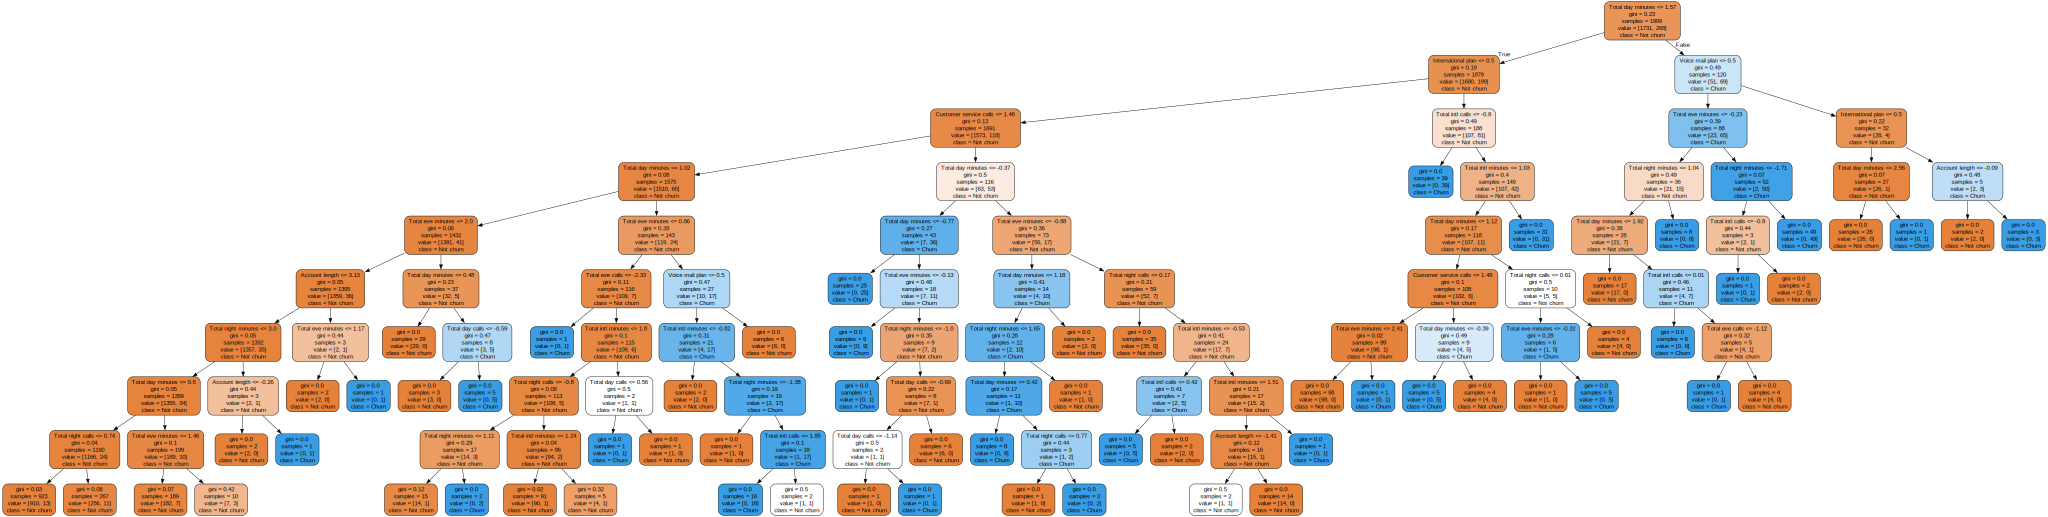

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display

decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")

telecom_churn_prediction(decision_tree, x_train, x_test, y_train, y_test, "features", threshold_plot=True)

#plot decision tree
treeplot(decision_tree, cols, ["Not churn", "Churn"])

##  Random Forest Classifier 
Random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

Algorithm: RandomForestClassifier

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       547
           1       0.92      0.56      0.69       120

    accuracy                           0.91       667
   macro avg       0.91      0.77      0.82       667
weighted avg       0.91      0.91      0.90       667

Accuracy Score: 0.9115442278860569
Area under curve: 0.7736822059719684 



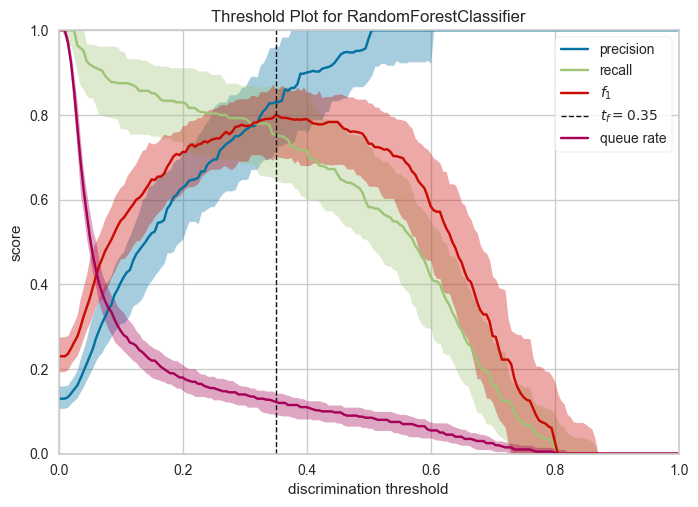

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, random_state = 123,
                             max_depth = 9, criterion = "gini")

telecom_churn_prediction(rfc, x_train, x_test, y_train, y_test, 'features', threshold_plot=True)

In [ ]:
#saving the random forest classifier model
with open('../models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [ ]:
with open('../models/random_forest_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
#prediction
model.predict(x_train)[0]

0

##  Support Vector Machine <a id = "support-vector-machine" > </a>
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space .where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes.

###  Support Vector Machine (linear) <a id = "support-vector-machine-linear"> </a>

Algorithm: SVC

Classification report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       547
           1       0.00      0.00      0.00       120

    accuracy                           0.82       667
   macro avg       0.41      0.50      0.45       667
weighted avg       0.67      0.82      0.74       667

Accuracy Score: 0.8200899550224887
Area under curve: 0.5 



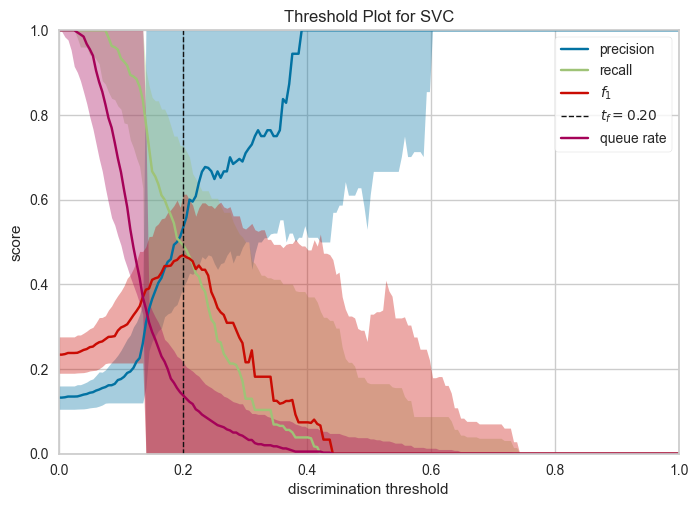

In [ ]:
from sklearn.svm import SVC

#Support vector classifier using linear hyper plane
svc_lin  = SVC(C=1.0, kernel='linear', probability=True, random_state=124)

telecom_churn_prediction(svc_lin, x_train, x_test, y_train, y_test, "coefficients", threshold_plot=True)

###  Support Vector Machine (rbf) <a id = " support-vector-machine-rbf"> </a>

Algorithm: SVC

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       547
           1       0.81      0.61      0.70       120

    accuracy                           0.90       667
   macro avg       0.86      0.79      0.82       667
weighted avg       0.90      0.90      0.90       667

Accuracy Score: 0.904047976011994
Area under curve: 0.7886273613650213 



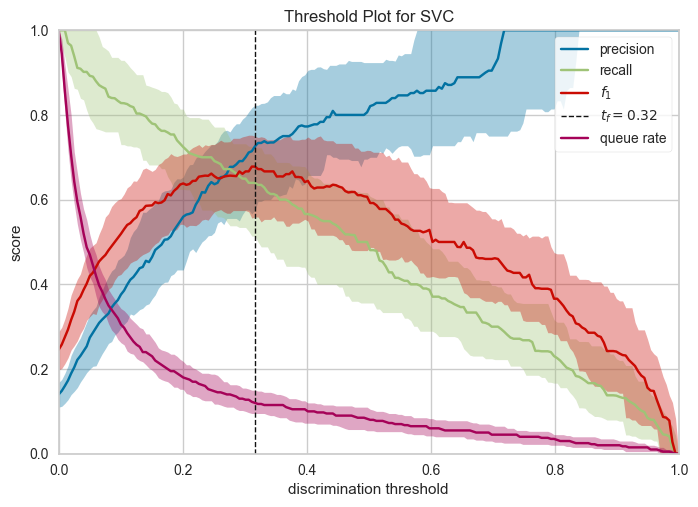

In [ ]:
#support vector classifier using non-linear hyper plane ("rbf")
svc_rbf  = SVC(C=10.0, kernel='rbf', gamma=0.1, probability=True, random_state=124)   

telecom_churn_prediction(svc_rbf, x_train, x_test, y_train, y_test, "None", threshold_plot=True)

# Model performances over the training dataset 

In [ ]:
#putting all the model names, model classes and the used columns in a dictionary
models = {'Logistic (Baseline)': [logit, cols],
          'Decision Tree': [decision_tree, cols], 
          'Random Forest': [rfc, cols], 
          'SVM (linear)': [svc_lin, cols], 
          'SVM (rbf)': [svc_rbf, cols], 
         }

## Model performance metrics

In [ ]:
#gives model report in dataframe
def model_report(model, training_x, testing_x, training_y, testing_y, name):
    model = model.fit(training_x, training_y)
    predictions = model.predict(testing_x)
    accuracy = accuracy_score(testing_y, predictions)
    recallscore = recall_score(testing_y, predictions)
    precision = precision_score(testing_y, predictions)
    roc_auc = roc_auc_score(testing_y, predictions)
    f1score = f1_score(testing_y, predictions) 
    kappa_metric = cohen_kappa_score(testing_y, predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy"        : [accuracy],
                       "Recall"          : [recallscore],
                       "Precision"       : [precision],
                       "f1-score"        : [f1score],
                       "Roc_auc"         : [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

In [ ]:
#outputs for all models over the training dataset
model_performances_train = pd.DataFrame() 
for name in models:
    if name == 'Logistic (SMOTE)':
        model_performances_train = model_performances_train.append(model_report(models[name][0], 
                                                                                x_smote[models[name][1]], x_test[models[name][1]], 
                                                                                y_smote, y_test, name), ignore_index=True)
    else:
        model_performances_train = model_performances_train.append(model_report(models[name][0], x_train[models[name][1]], 
                                                                                x_test[models[name][1]], 
                                                                                y_train, y_test, name), ignore_index=True)
        
table_train = ff.create_table(np.round(model_performances_train, 4))
py.iplot(table_train)

## Compare model metrics

In [ ]:
def output_tracer(df, metric, color):
    tracer = go.Bar(y = df["Model"],
                    x = df[metric],
                    orientation = "h", name = metric ,
                    marker = dict(line = dict(width =.7), color = color)
                   )
    return tracer

def modelmetricsplot(df, title):
    layout = go.Layout(dict(title = title,
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5, gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1, ticklen=5, gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )
    trace1 = output_tracer(df, "Accuracy", "#6699FF")
    trace2 = output_tracer(df, 'Recall', "red")
    trace3 = output_tracer(df, 'Precision', "#33CC99")
    trace4 = output_tracer(df, 'f1-score', "lightgrey")
    trace5 = output_tracer(df, 'Roc_auc', "magenta")
    trace6 = output_tracer(df, 'Kappa_metric', "#FFCC99")

    data = [trace1, trace2, trace3, trace4, trace5, trace6]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [ ]:
modelmetricsplot(df=model_performances_train, title="Model performances over the training dataset")

## Confusion matrices for models

In [ ]:
def confmatplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)
        if name=='Logistic (SMOTE)':
            model = modeldict[name][0].fit(df_train[1][modeldict[name][1]], target_train[1])
            predictions = model.predict(df_test[modeldict[name][1]])
            conf_matrix = confusion_matrix(target_test, predictions)
            sns.heatmap(conf_matrix, annot=True, fmt = "d", square = True,
                        xticklabels=["Not churn", "Churn"],
                        yticklabels=["Not churn", "Churn"],
                        linewidths = 2, linecolor = "w", cmap = "Set1")
            plt.title(name, color = "b")
            plt.subplots_adjust(wspace = .3, hspace = .3)
        else:
            model = modeldict[name][0].fit(df_train[0][modeldict[name][1]], target_train[0])
            predictions = model.predict(df_test[modeldict[name][1]])
            conf_matrix = confusion_matrix(target_test, predictions)
            sns.heatmap(conf_matrix, annot=True, fmt = "d", square = True,
                        xticklabels=["Not churn", "Churn"],
                        yticklabels=["Not churn", "Churn"],
                        linewidths = 2, linecolor = "w", cmap = "Set1")
            plt.title(name, color = "b")
            plt.subplots_adjust(wspace = .3, hspace = .3)

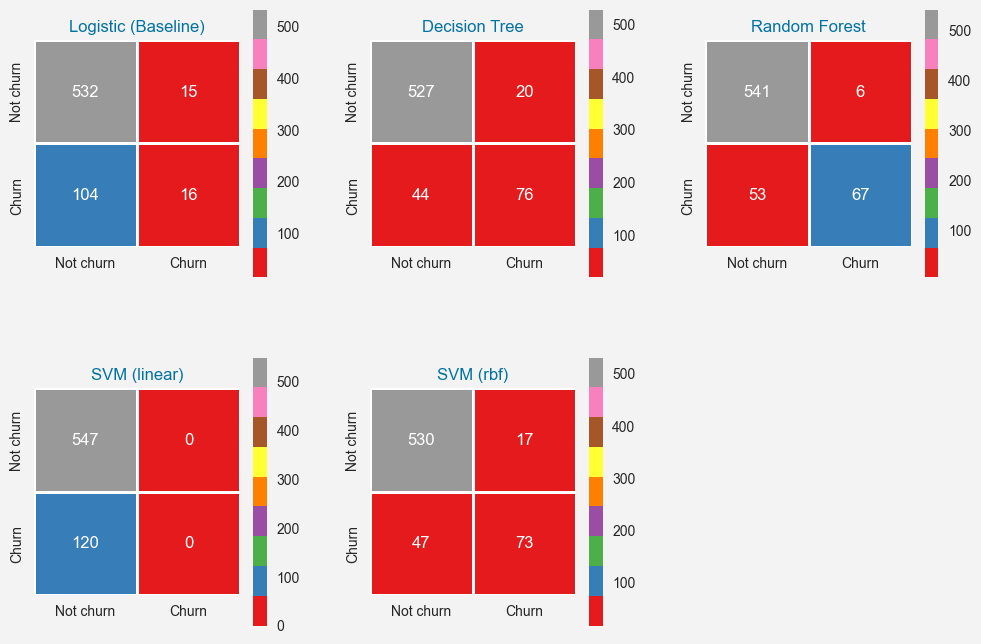

In [ ]:
confmatplot(modeldict=models, df_train=[x_train], df_test=x_test, 
             target_train=[y_train], target_test=y_test, figcolnumber=3)

## ROC - Curves for models

In [ ]:
def rocplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        qx = plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)
        if name=='Logistic (SMOTE)':
            model = modeldict[name][0].fit(df_train[1][modeldict[name][1]], target_train[1])
            probabilities = model.predict_proba(df_test[modeldict[name][1]])
            predictions = model.predict(df_test[modeldict[name][1]])
                        
            fpr, tpr, thresholds = roc_curve(target_test, probabilities[:,1])
            plt.plot(fpr, tpr, linestyle = "dotted",
                     color = "royalblue", linewidth = 2,
                     label = "AUC = " + str(np.around(roc_auc_score(target_test, predictions), 3)))
            plt.plot([0,1],[0,1], linestyle = "dashed",
                     color = "orangered", linewidth = 1.5)
            plt.fill_between(fpr, tpr, alpha = .1)
            plt.fill_between([0, 1], [0, 1], color = "b")
            plt.legend(loc = "lower right",
                       prop = {"size" : 12})
            qx.set_facecolor("w")
            plt.grid(True, alpha = .15)
            plt.title(name, color = "b")
            plt.xticks(np.arange(0, 1, .3))
            plt.yticks(np.arange(0, 1, .3))
       
        else:
            model = modeldict[name][0].fit(df_train[0][modeldict[name][1]], target_train[0])
            probabilities = model.predict_proba(df_test[modeldict[name][1]])
            predictions = model.predict(df_test[modeldict[name][1]])
                        
            fpr, tpr, thresholds = roc_curve(target_test, probabilities[:,1])
            plt.plot(fpr, tpr, linestyle = "dotted",
                     color = "royalblue", linewidth = 2,
                     label = "AUC = " + str(np.around(roc_auc_score(target_test, predictions), 3)))
            plt.plot([0,1],[0,1], linestyle = "dashed",
                     color = "orangered", linewidth = 1.5)
            plt.fill_between(fpr, tpr, alpha = .1)
            plt.fill_between([0, 1], [0, 1], color = "b")
            plt.legend(loc = "lower right",
                       prop = {"size" : 12})
            qx.set_facecolor("w")
            plt.grid(True, alpha = .15)
            plt.title(name, color = "b")
            plt.xticks(np.arange(0, 1, .3))
            plt.yticks(np.arange(0, 1, .3))

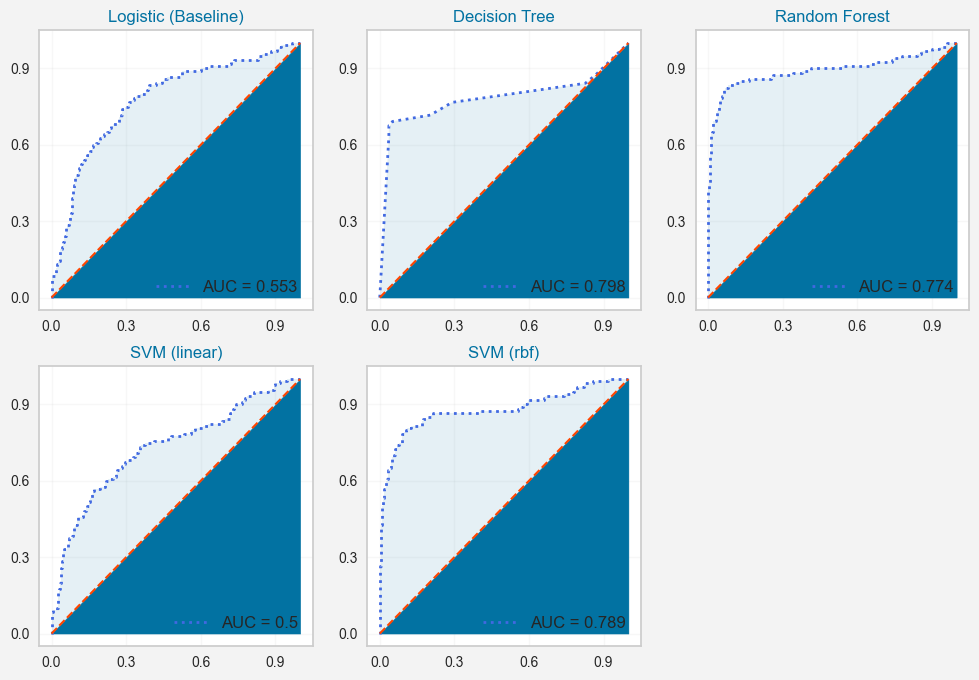

In [ ]:
rocplot(modeldict=models, df_train=[x_train], df_test=x_test, 
             target_train=[y_train], target_test=y_test, figcolnumber=3)

## Precision recall curves

In [ ]:
def prcplot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize=(4*figcolnumber, 4*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        qx = plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos+1)
        if name=='Logistic (SMOTE)':
            model = modeldict[name][0].fit(df_train[1][modeldict[name][1]], target_train[1])
            probabilities = model.predict_proba(df_test[modeldict[name][1]])
            predictions = model.predict(df_test[modeldict[name][1]])
            
            recall, precision, thresholds = precision_recall_curve(target_test, probabilities[:,1])
            plt.plot(recall, precision, linewidth = 1.5,
                     label = ("avg_pcn: "+str(np.around(average_precision_score(target_test, predictions), 3))))
            plt.plot([0, 1], [0, 0], linestyle = "dashed")
            plt.fill_between(recall, precision, alpha = .1)
            plt.legend(loc = "lower left", prop = {"size": 10})
            qx.set_facecolor("w")
            plt.grid(True, alpha = .15)
            plt.title(name, color = "b")
            plt.xlabel("recall", fontsize=7)
            plt.ylabel("precision", fontsize=7)
            plt.xlim([0.25,1])
            plt.yticks(np.arange(0, 1, .3))
        else:
            model = modeldict[name][0].fit(df_train[0][modeldict[name][1]], target_train[0])
            probabilities = model.predict_proba(df_test[modeldict[name][1]])
            predictions = model.predict(df_test[modeldict[name][1]])
            
            recall, precision, thresholds = precision_recall_curve(target_test, probabilities[:,1])
            plt.plot(recall, precision, linewidth = 1.5,
                     label = ("avg_pcn: "+str(np.around(average_precision_score(target_test, predictions), 3))))
            plt.plot([0, 1], [0, 0], linestyle = "dashed")
            plt.fill_between(recall, precision, alpha = .1)
            plt.legend(loc = "lower left", prop = {"size": 10})
            qx.set_facecolor("w")
            plt.grid(True, alpha = .15)
            plt.title(name, color = "b")
            plt.xlabel("recall", fontsize=7)
            plt.ylabel("precision", fontsize=7)
            plt.xlim([0.25,1])
            plt.yticks(np.arange(0, 1, .3))

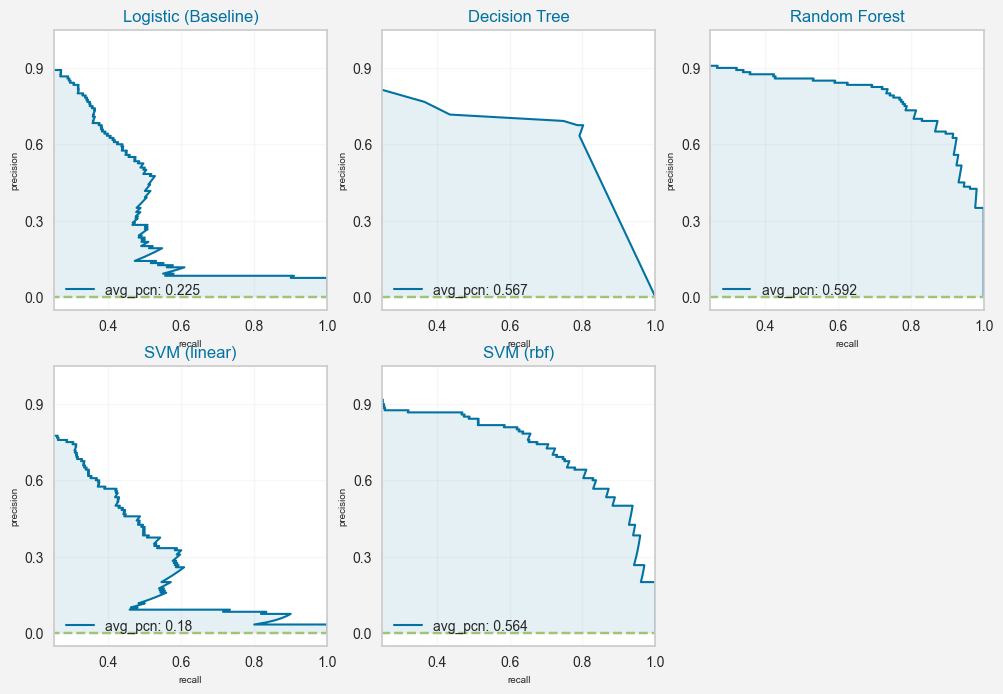

In [ ]:
prcplot(modeldict=models, df_train=[x_train], df_test=x_test, 
             target_train=[y_train], target_test=y_test, figcolnumber=3)

# Model performances over the principal test dataset

## Model performance metrics

In [ ]:
#outputs for all models over the principal test dataset
model_performances_test = pd.DataFrame() 
for name in models:
    if name == 'Logistic (SMOTE)':
        model_performances_test = model_performances_test.append(model_report(models[name][0], 
                                                                              x_smote[models[name][1]], test_data[models[name][1]], 
                                                                              y_smote, test_data[target_col], name), ignore_index=True)
    else:
        model_performances_test = model_performances_test.append(model_report(models[name][0], 
                                                                              x_train[models[name][1]], test_data[models[name][1]], 
                                                                              y_train, test_data[target_col], name), ignore_index=True)
        
table_test = ff.create_table(np.round(model_performances_test, 4))
py.iplot(table_test)

## Compare model metrics

In [ ]:
modelmetricsplot(df=model_performances_test, title="Model performances over the principal test dataset")

## Confusion matrices for models

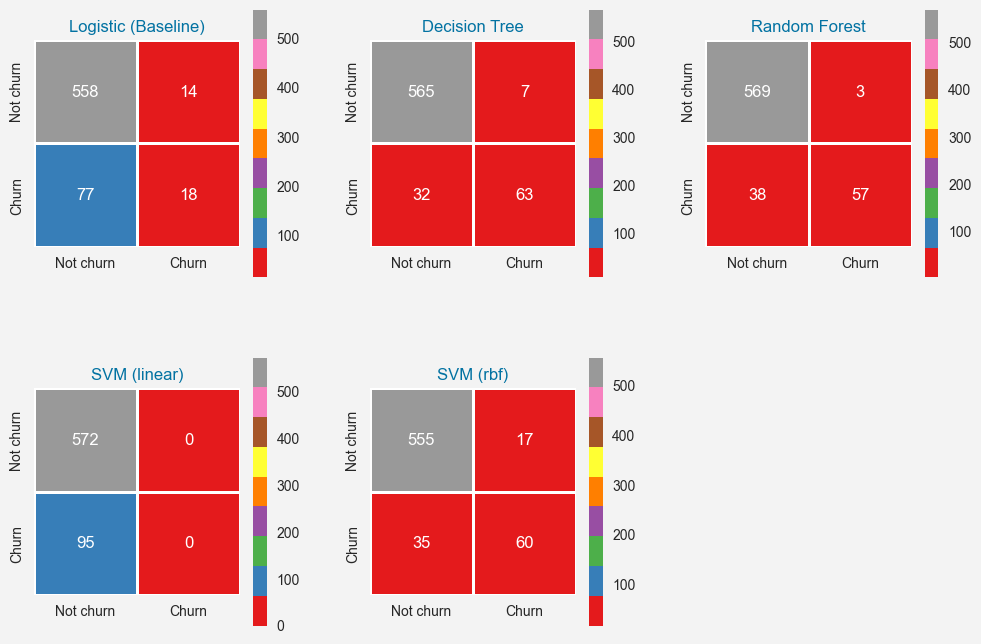

In [ ]:
confmatplot(modeldict=models, df_train=[x_train], df_test=test_data[cols], 
             target_train=[y_train], target_test=test_data[target_col], figcolnumber=3)

## ROC - Curves for models

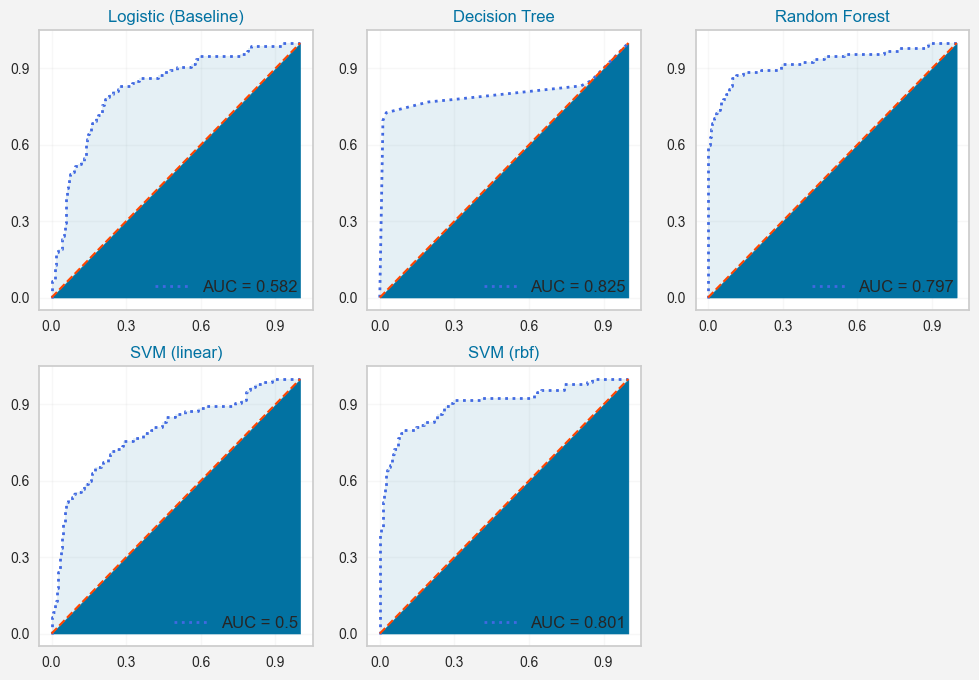

In [ ]:
rocplot(modeldict=models, df_train=[x_train], df_test=test_data[cols], 
             target_train=[y_train], target_test=test_data[target_col], figcolnumber=3)

# Precision recall curves

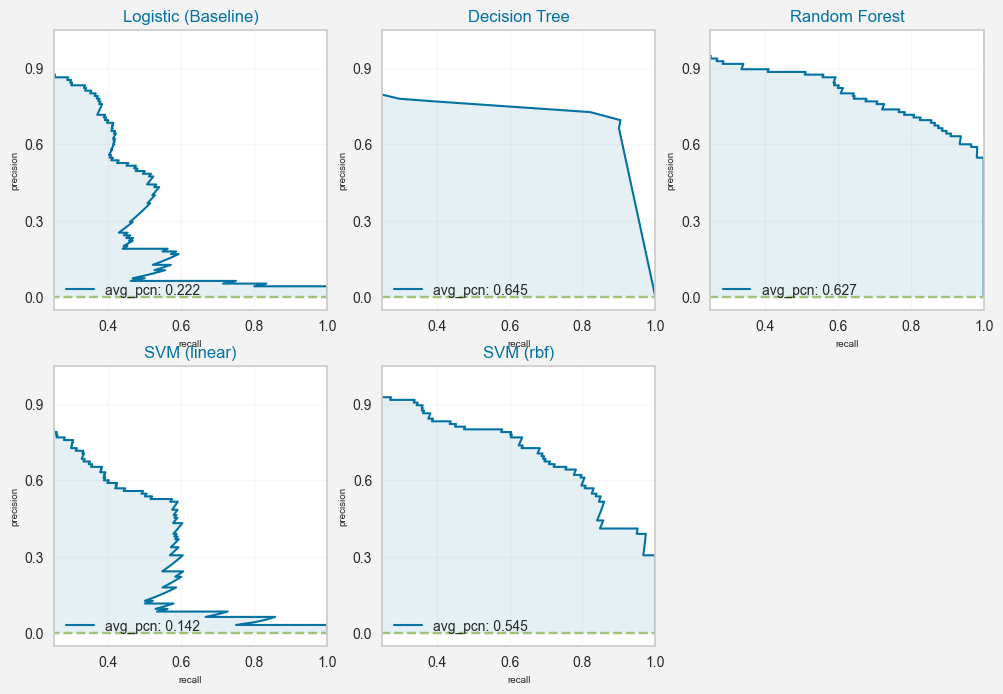

In [ ]:
prcplot(modeldict=models, df_train=[x_train], df_test=test_data[cols], 
             target_train=[y_train], target_test=test_data[target_col], figcolnumber=3)

By evaluating the performance metrics of all the developed models over the training and test datasets, we have decided to deploy the project with the Random Forest classifier model.